In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [19]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding='iso-8859-1')

In [23]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [24]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [25]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [26]:
df_total_data=pd.DataFrame(df.isnull().sum()) 
df_total_data 
less_data_table=df_total_data[df_total_data[0]>1000] 

In [27]:
for i in less_data_table.index:
    df.drop(i,axis=1,inplace=True)

In [28]:
pd.DataFrame(df.isnull().sum()).head(10)

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,423
Orders.id,0
Orders.customer_id,0
Orders.fname,0
Orders.lname,0


In [29]:
import numpy as np

In [30]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [31]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-deta

In [41]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [84]:
x=df[["Customers.id","Customers.customer_type","Order_Items.price","Order_Items.id","Orders.payment_amount"]]

In [85]:
x.head()

,Customers.id,Customers.customer_type,Order_Items.price,Order_Items.id,Orders.payment_amount
0,797,0.0,57.20,5284,64.29
1,3,0.0,5.00,31,29.99
2,3,0.0,68.78,11655,78.73
3,4,0.0,19.56,1816,29.55
4,5,0.0,36.05,40,46.00


In [86]:
model=KMeans(n_clusters=4)

In [87]:
model=model.fit(x)

In [88]:
tahmin=model.predict(x)

In [89]:
tahmin

array([2, 0, 1, ..., 3, 3, 3])

In [90]:
x["cluster"]=tahmin

In [91]:
x.head()

,Customers.id,Customers.customer_type,Order_Items.price,Order_Items.id,Orders.payment_amount,cluster
0,797,0.0,57.20,5284,64.29,2
1,3,0.0,5.00,31,29.99,0
2,3,0.0,68.78,11655,78.73,1
3,4,0.0,19.56,1816,29.55,0
4,5,0.0,36.05,40,46.00,0


In [92]:
silhouette_score(x,tahmin)

0.5557130076998266

In [93]:
import matplotlib.pyplot as plt

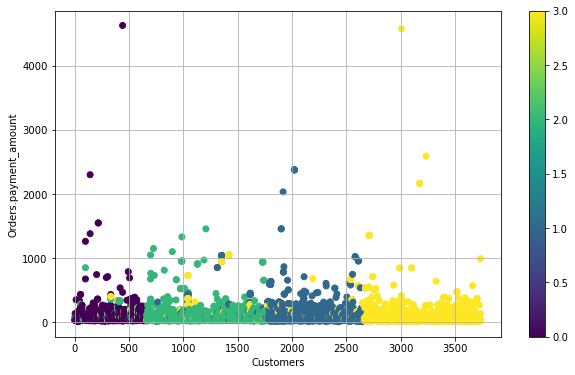

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(x["Customers.id"],x["Orders.payment_amount"],c=tahmin)
plt.xlabel("Customers")
plt.ylabel("Orders.payment_amount")
plt.colorbar()
plt.grid()

In [97]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(20)

Cluster  2  score  0.695317495407017
Cluster  3  score  0.6012787609787884
Cluster  4  score  0.5557130076998266
Cluster  5  score  0.5531585980275562
Cluster  6  score  0.5226808565949744
Cluster  7  score  0.5123335146931063
Cluster  8  score  0.5036218922251683
Cluster  9  score  0.48429924486308557
Cluster  10  score  0.4844168897817561
Cluster  11  score  0.4768292903976265
Cluster  12  score  0.4656728986848173
Cluster  13  score  0.47837996614171974
Cluster  14  score  0.4790718105616317
Cluster  15  score  0.4676041760221722
Cluster  16  score  0.4683383012436274
Cluster  17  score  0.46384778074329613
Cluster  18  score  0.47052219011611307
Cluster  19  score  0.4577409424041183
Cluster  20  score  0.45299123049531476
Cluster  21  score  0.4643272763845807


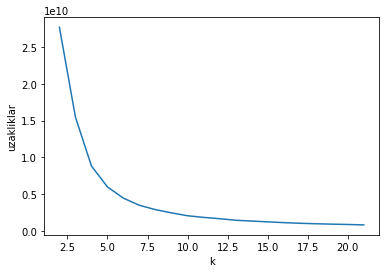

In [98]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar)

In [99]:
df[df["Order_Items.price"]>1000]

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
227,218,Gareth,Renkes,1404307840,1437763440,0.000000,965,218,Gareth,Renkes,965,USD,1548.06,0.00,0.000000,1647.06,manual,-1|Free Shipping,15452771,3.0,1.404309e+09,authorize.net,1548.060000,6303181136,187371,1,1404309166,1.438868e+09,1.404486e+09,0.0,1849,965,2671.0,"Titan Front Wheel Power Wheelchair 20"" Captain...",1,1475.00,1049.0,2671.000000,3.000000,sub-product-detail.html,2.000000,1.000000,Titan Transportable Front Wheel Power Wheelchair,Titan Transportable Front Wheel Power Wheelcha...,5891.500000,1475.000000,1049.000000,1.463404e+09,Drive Medical,titan20cs,62.000000,health-care-products,online:en:US:2671,Wheelchairs > Power Wheelchairs & Scooters > F...,Health & Beauty > Health Care,80007536-1438230594,1.450467e+09,<p>The front wheel drive Titan power wheelchai...,Titan Transportable Front Wheel Power Wheelcha...,Titan-Transportable-Front-Wheel-Power-Wheelcha...,EA,K0821,42.000000,26.00000,24.000000,PM16,3.000000
872,726,Candace,Lay,1424278761,1437763154,0.000000,3576,726,Candace,Lay,3576,USD,1149.00,0.00,0.000000,1149.00,manual,-1|Free Shipping,REDDAWAY - 52362479596,3.0,1.424279e+09,authorize.net,1149.000000,6933933874,06997Z,1,1424278951,1.438868e+09,1.424447e+09,0.0,5087,3576,2723.0,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1,1149.00,819.0,2723.000000,3.000000,sub-product-detail.html,2.000000,1.000000,"Phoenix Heavy Duty Power Scooter, 3 Wheel","Phoenix Heavy Duty Power Scooter, 3 Wheel",2548.000000,1149.000000,819.000000,1.463404e+09,Drive Medical,phoenixhd3,62.000000,health-care-products,online:en:US:2723,Wheelchairs > Power Wheelchairs & Scooters > 3...,Health & Beauty > Health Care > Mobility & Acc...,8000214E-1434307004,1.450467e+09,"<p>If you're seeking an easy, transportable mo...","Phoenix Heavy Duty Power Scooter, 3 Wheel | Dr...",Phoenix-Heavy-Duty-Power-Scooter-3-Wheel,EA,K0801,51.000000,24.00000,22.000000,PM45,3.000000
1089,899,Boris,Pikhtovnikoff,1427995536,1437763400,0.000000,3979,899,Boris,Pikhtovnikoff,3979,USD,1199.00,0.00,0.000000,1100.00,manual,0|Free Shipping,5006442993,3.0,1.427996e+09,authorize.net,1100.000000,0,02708Z,1,1427995536,1.438868e+09,1.428938e+09,0.0,5532,3979,2724.0,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1,1199.00,869.0,2724.000000,3.000000,sub-product-detail.html,2.000000,1.000000,"Phoenix Heavy Duty Power Scooter, 4 Wheel","Phoenix Heavy Duty Power Scooter, 4 Wheel",2730.000000,1199.000000,869.000000,1.463404e+09,Drive Medical,phoenixhd4,62.000000,health-care-products,generic/online%3Aen%3AUS%3A2724,Wheelchairs > Power Wheelchairs & Scooters > 3...,Health & Beauty > Health Care > Mobility & Acc...,8000214F-1434307006,1.450467e+09,"<p>If you're seeking an easy, transportable mo...","Phoenix Heavy 